<a href="https://colab.research.google.com/github/Nohalottt/employee-attrition-prediction/blob/main/emplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)
pd.set_option('display.max_columns', None)
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns")

There is 1470 rows and 35 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


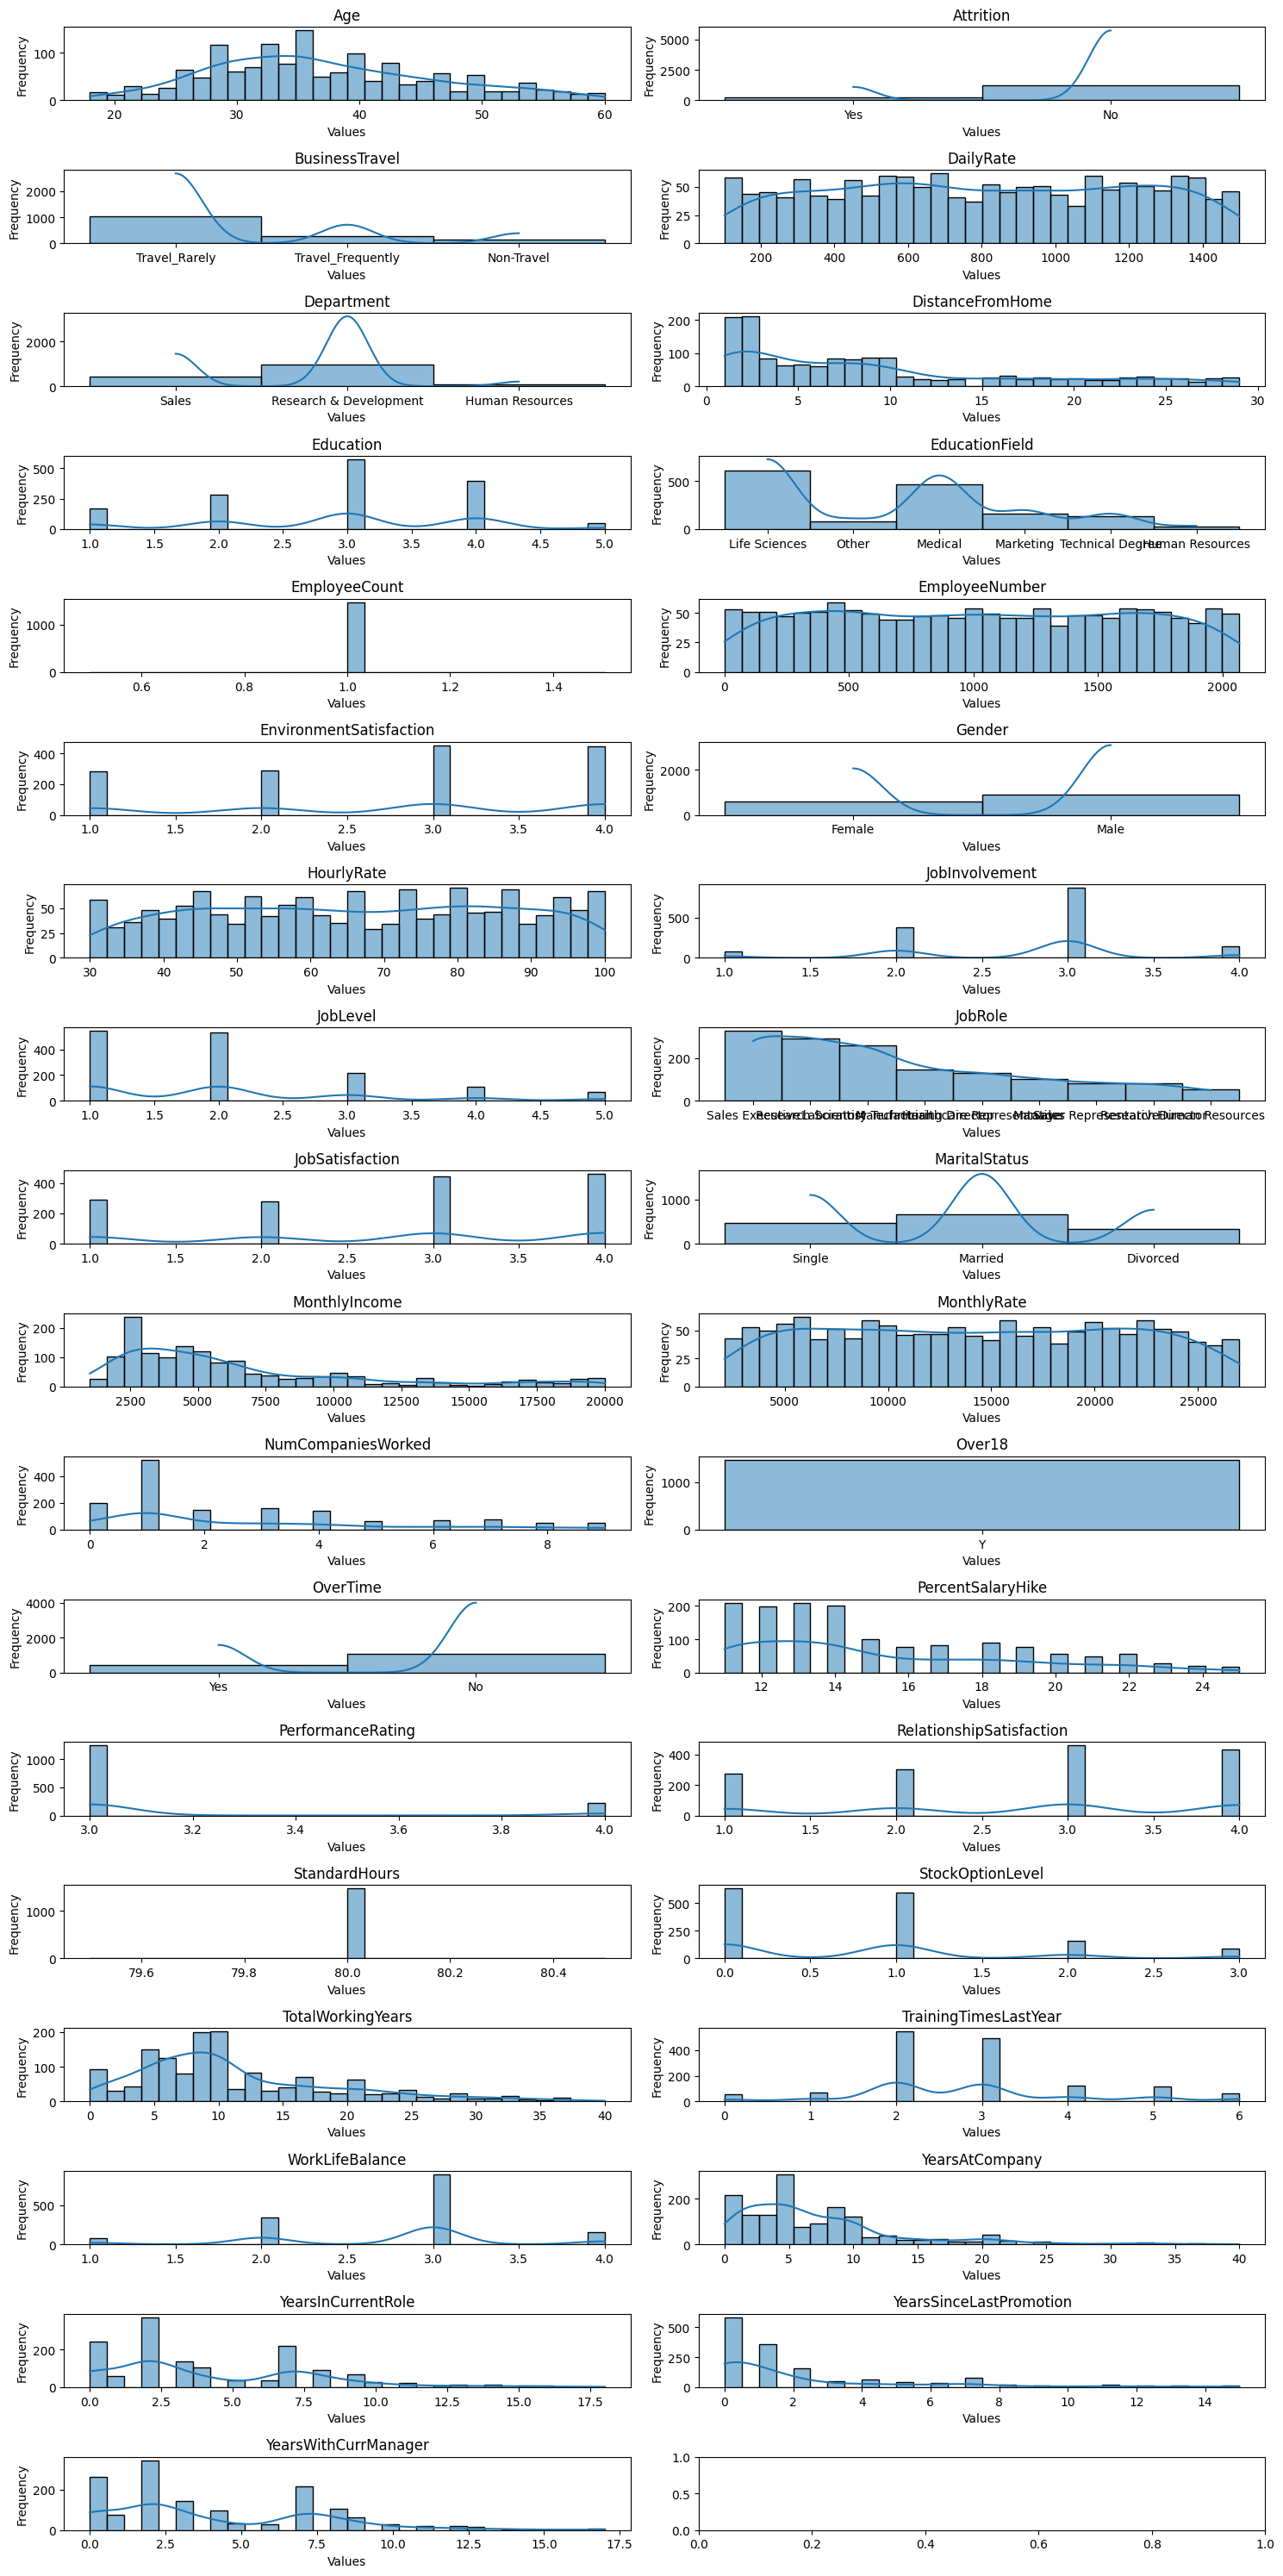

In [10]:
# Set the number of columns per row in the subplot grid
cols_per_row = 2

# Determine the number of rows needed for the subplot grid
num_cols = df.shape[1]
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

# Create a figure and axis object using subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 30))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over each column and create a histplot
for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], kde=True, bins=30, alpha=0.5, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [11]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [17]:
df['Over18'] = df['Over18'].map({'Y':1})

In [18]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})

In [20]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [21]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

In [22]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1})

In [24]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [25]:
df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development':1, 'Human Resources':2})

In [26]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [27]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2})

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [29]:
one_hot_encoded = pd.get_dummies(df[['EducationField', 'JobRole']], prefix='category')
one_hot_encoded = one_hot_encoded.astype(int)
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [30]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [31]:
df_encoded.drop(['EducationField', 'JobRole'], axis=1, inplace=True)

In [32]:
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,1,1,2,0,94,3,2,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,1,4,4,1,92,2,1,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,1,7,1,1,40,3,1,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [34]:
df_encoded.to_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv', index=False)

In [36]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,1,1,2,0,94,3,2,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,1,4,4,1,92,2,1,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,1,7,1,1,40,3,1,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns")

There is 1470 rows and 48 columns


In [40]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
767,37,0,0,124,1,3,3,1,1062,4,0,35,3,2,2,0,4107,13848,3,1,0,15,3,1,80,0,8,3,2,4,3,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1415,33,0,2,1313,1,1,2,1,1994,2,1,59,2,1,3,2,2008,20439,1,1,0,12,3,3,80,3,1,2,2,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1042,44,0,2,981,1,5,3,1,1471,3,1,90,2,1,3,0,3162,7973,3,1,0,14,3,4,80,0,7,5,3,5,2,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
82,55,0,0,111,0,1,2,1,106,1,1,70,3,3,4,1,10239,18092,3,1,0,14,3,4,80,1,24,4,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1353,34,1,2,967,1,16,4,1,1905,4,1,85,1,1,1,1,2307,14460,1,1,1,23,4,2,80,1,5,2,3,5,2,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [41]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.392517,802.485714,0.739456,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,2.728571,0.902721,6502.931293,14313.103401,2.693197,1.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.134321,0.492406,0.310692,0.464931,0.229579,0.285986,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,0.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,0.000000,2911.000000,8047.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,802.000000,1.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,1.000000,8379.000000,20461.500000,4.000000,1.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   Attrition                           1470 non-null   int64
 2   BusinessTravel                      1470 non-null   int64
 3   DailyRate                           1470 non-null   int64
 4   Department                          1470 non-null   int64
 5   DistanceFromHome                    1470 non-null   int64
 6   Education                           1470 non-null   int64
 7   EmployeeCount                       1470 non-null   int64
 8   EmployeeNumber                      1470 non-null   int64
 9   EnvironmentSatisfaction             1470 non-null   int64
 10  Gender                              1470 non-null   int64
 11  HourlyRate                          1470 non-null   int64
 12  JobInv

In [43]:
df['Attrition'].describe()

,Attrition
count,1470.000000
mean,0.161224
std,0.367863
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [44]:
print(df.corr()['Attrition'].abs().sort_values(ascending=False))

Attrition                             1.000000
OverTime                              0.246118
TotalWorkingYears                     0.171063
JobLevel                              0.169105
MaritalStatus                         0.162070
YearsInCurrentRole                    0.160545
MonthlyIncome                         0.159840
Age                                   0.159205
category_Sales Representative         0.157234
YearsWithCurrManager                  0.156199
StockOptionLevel                      0.137145
YearsAtCompany                        0.134392
JobInvolvement                        0.130016
JobSatisfaction                       0.103481
EnvironmentSatisfaction               0.103369
category_Laboratory Technician        0.098290
category_Research Director            0.088870
category_Manager                      0.083316
category_Manufacturing Director       0.082994
category_Healthcare Representative    0.078696
DistanceFromHome                      0.077924
category_Tech

In [45]:
df['Attrition'].values


array([1, 0, 1, ..., 0, 0, 0])

0    1233
1     237
Name: Attrition, dtype: int64


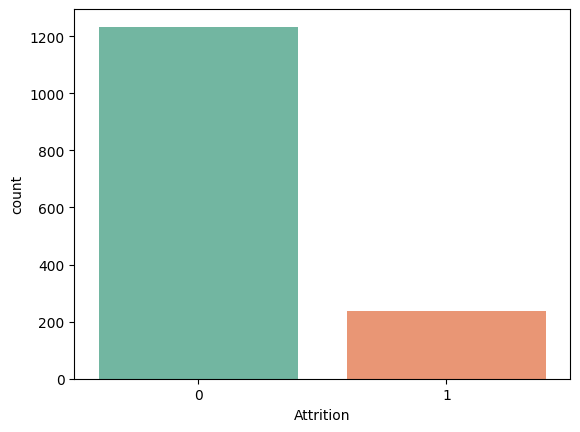

In [46]:
y = df['Attrition']

sns.countplot(x=y, palette='Set2')

target_temp = df['Attrition'].value_counts()
print(target_temp)

In [47]:
print(f"Percentage of Employees who's still working: {str(round(target_temp[0]*100/1470, 2))}")
print(f"Percentage of Employees who's left company: {str(round(target_temp[1]*100/1470, 2))}")

Percentage of Employees who's still working: 83.88
Percentage of Employees who's left company: 16.12


In [48]:
x = df.columns
for i in x:
    print(i)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
category_Human Resources
category_Life Sciences
category_Marketing
category_Medical
category_Other
category_Technical Degree
category_Healthcare Representative
category_Human Resources.1
category_Laboratory Technician
category_Manager
category_Manufacturing Director
category_Research Director
category_Research Scientist
category_Sales Executive
category_Sales Representative


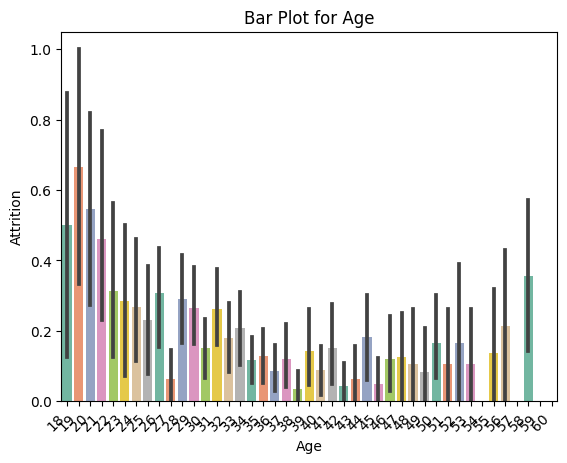

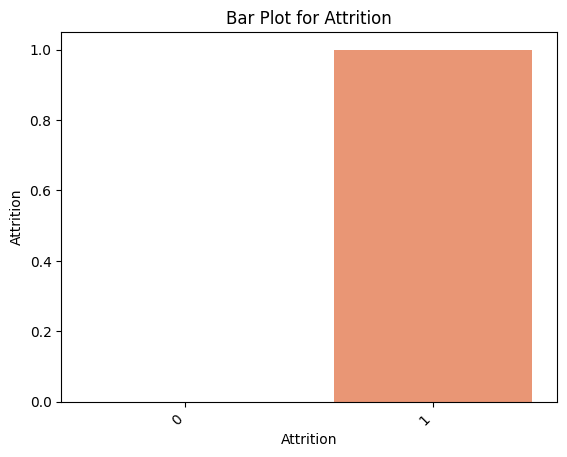

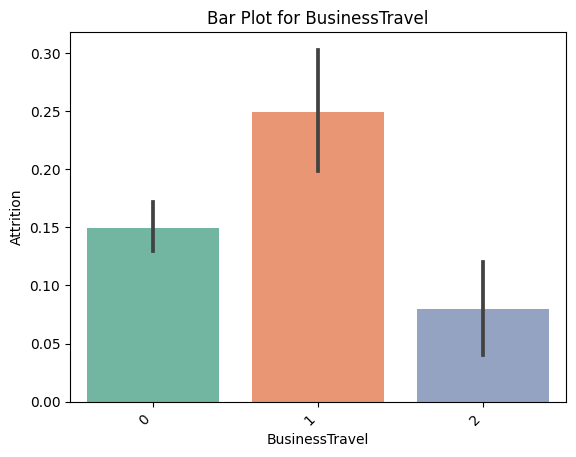

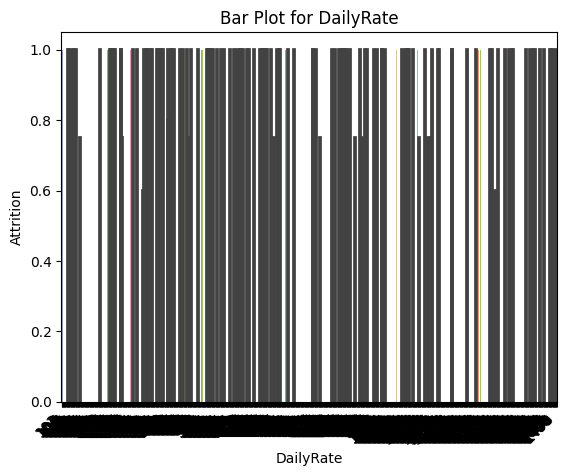

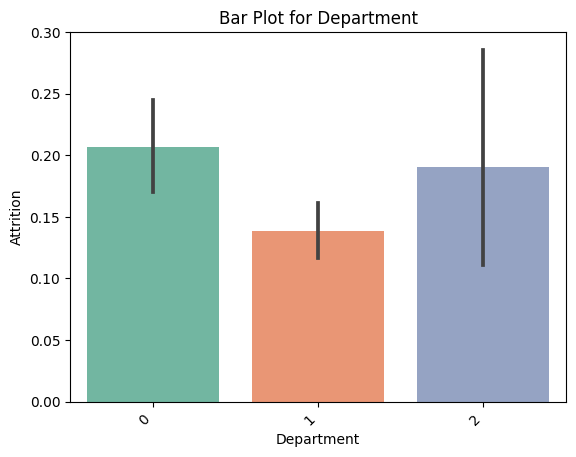

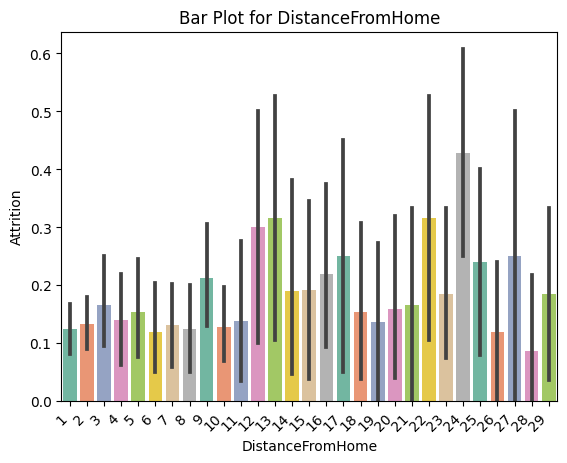

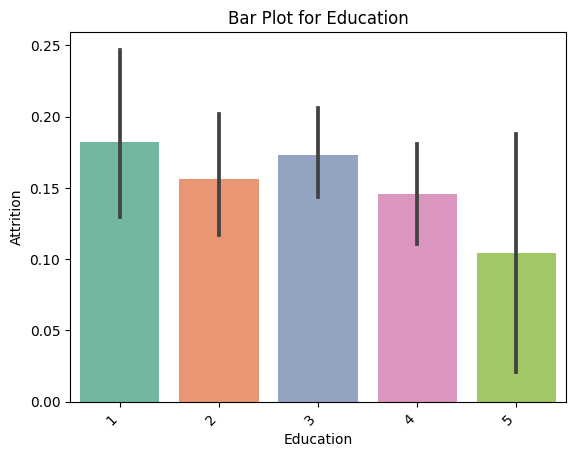

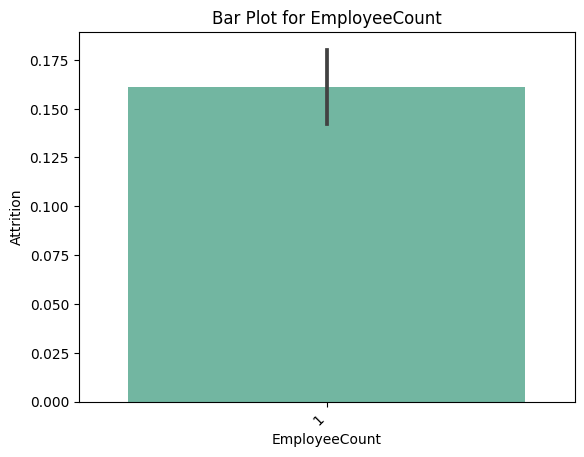

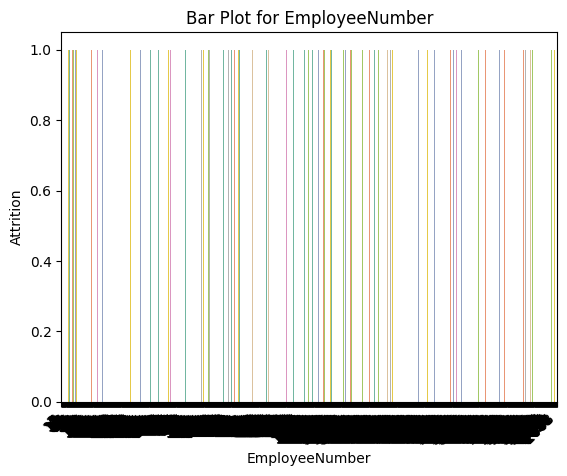

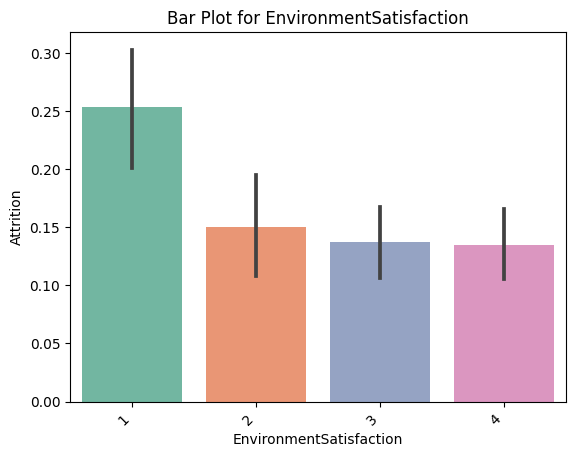

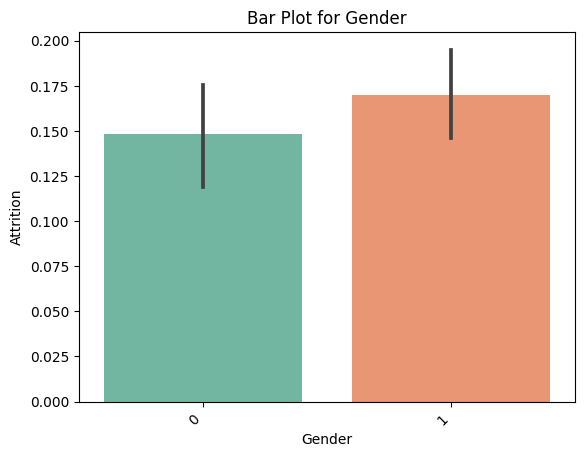

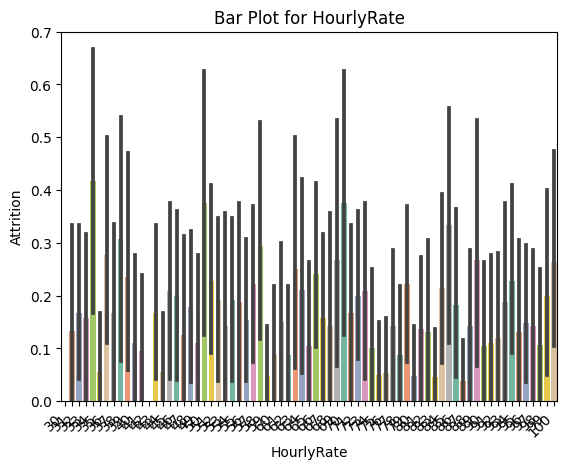

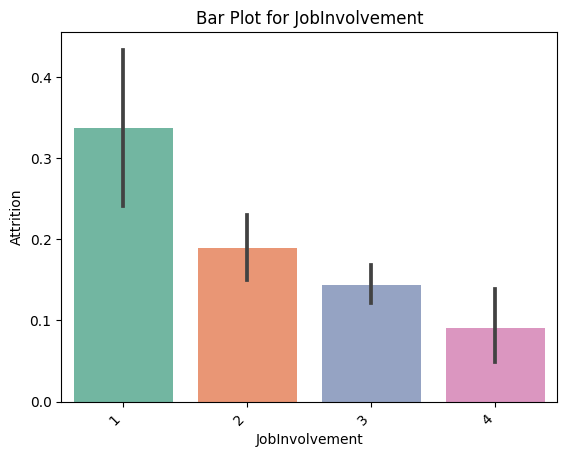

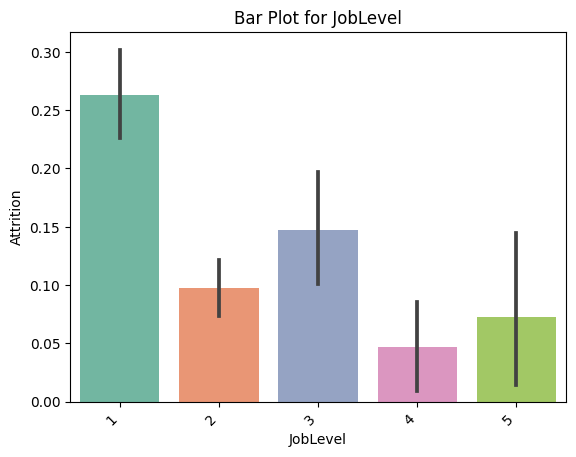

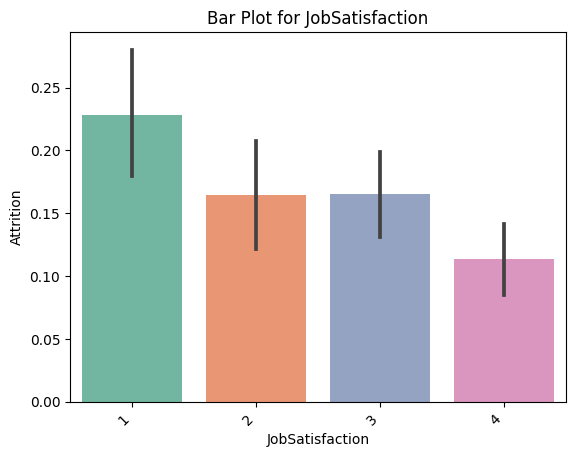

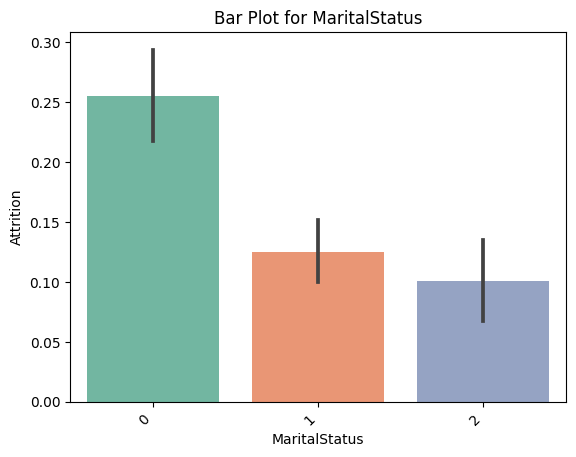

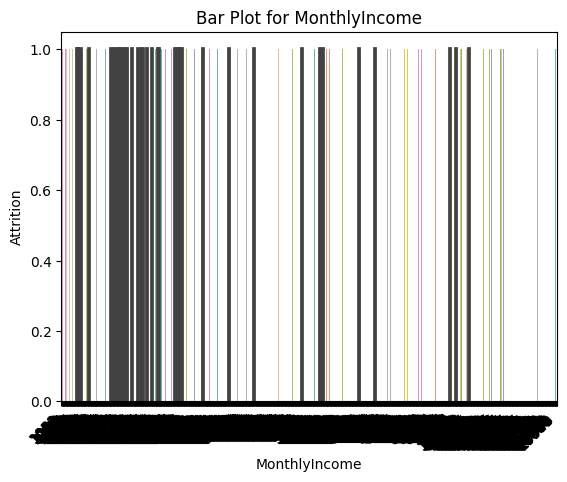

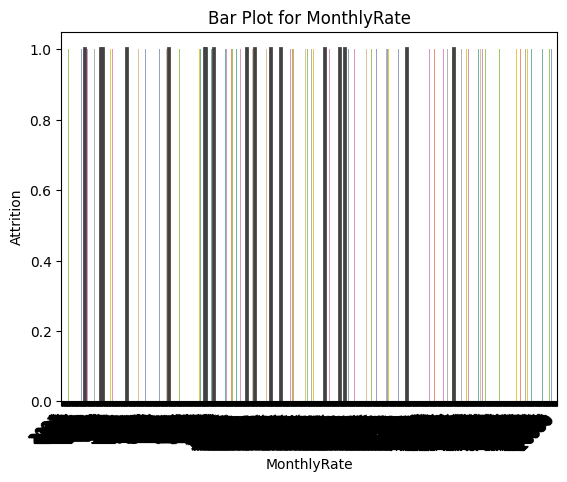

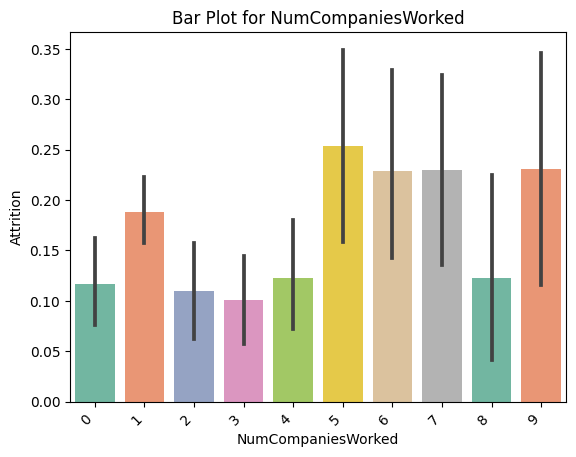

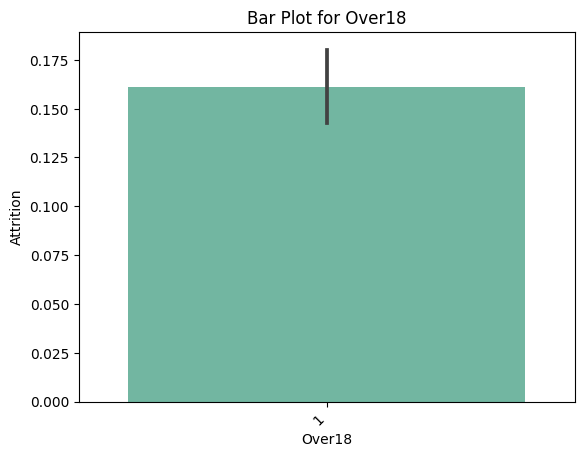

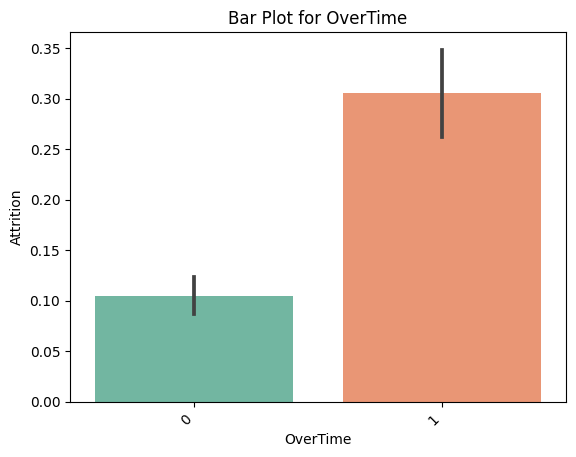

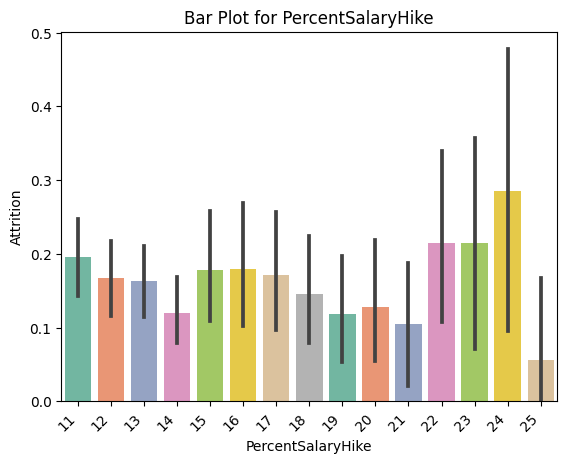

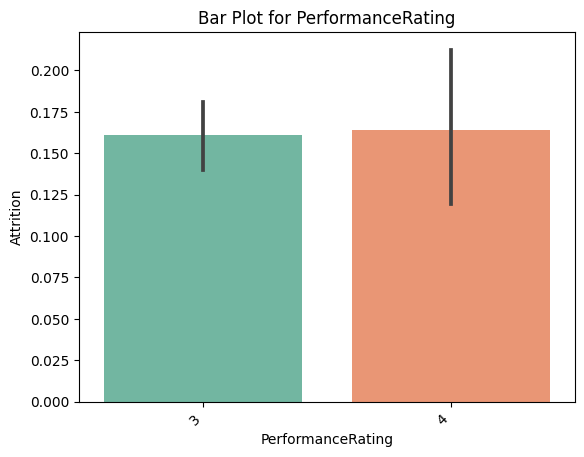

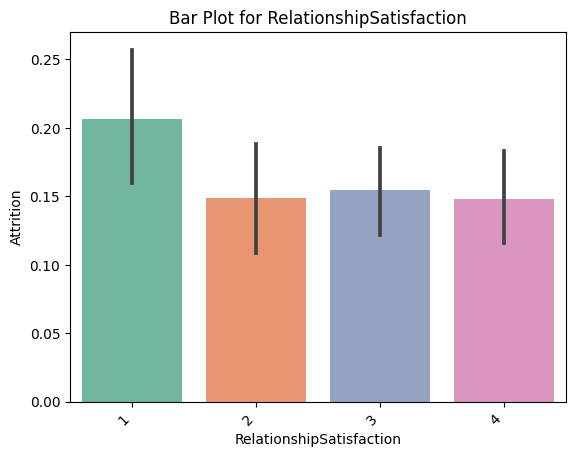

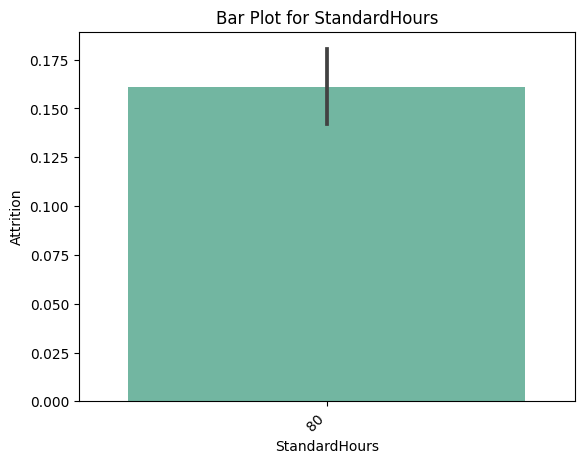

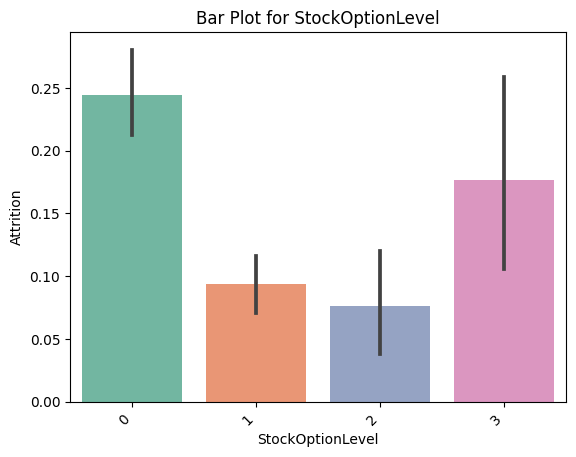

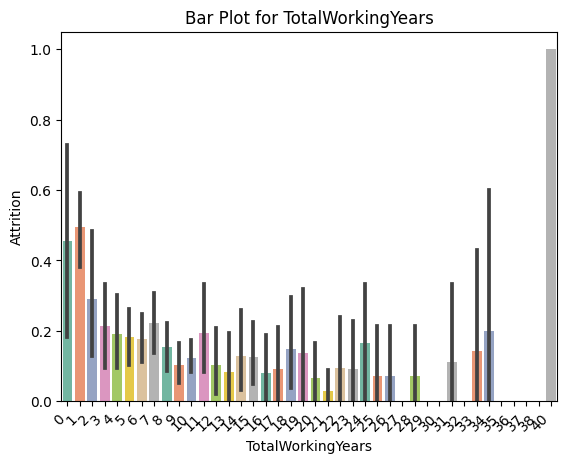

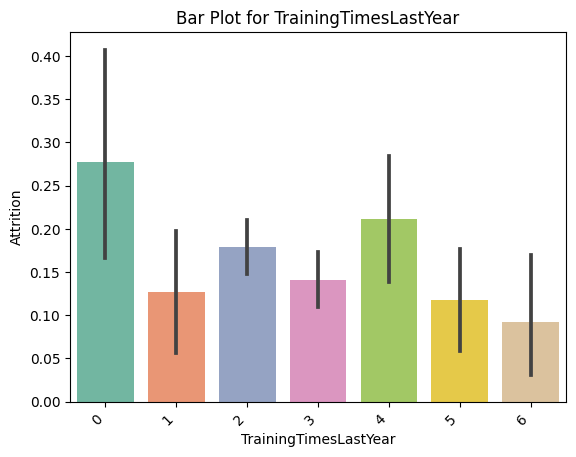

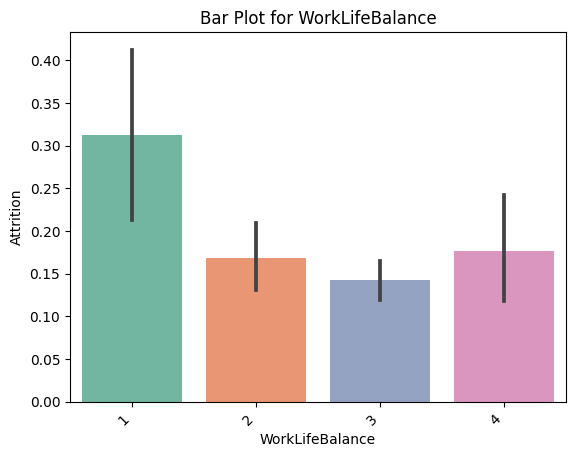

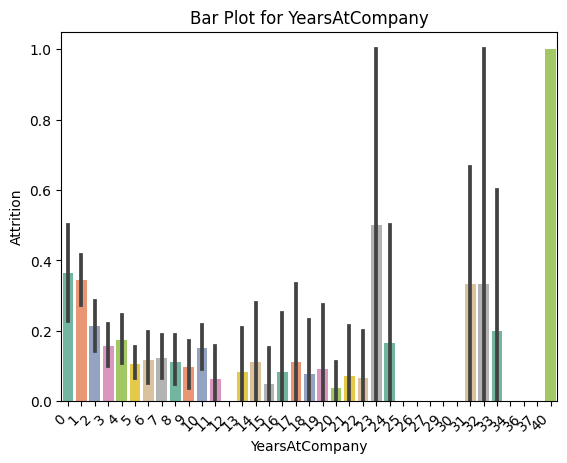

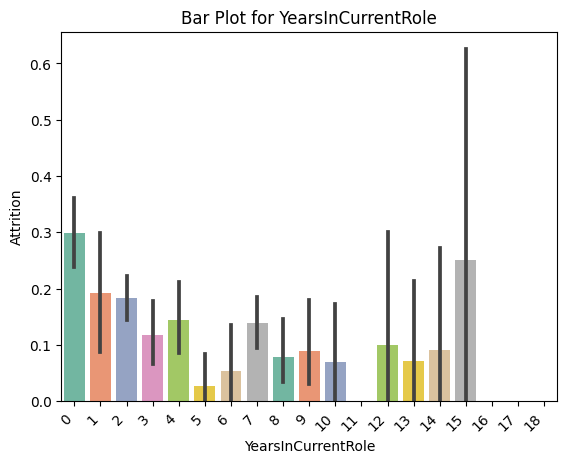

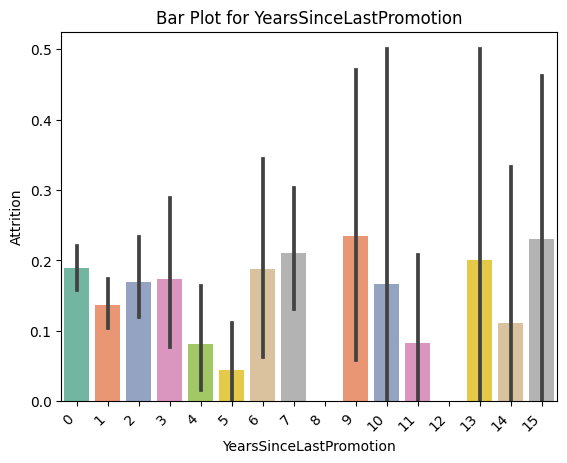

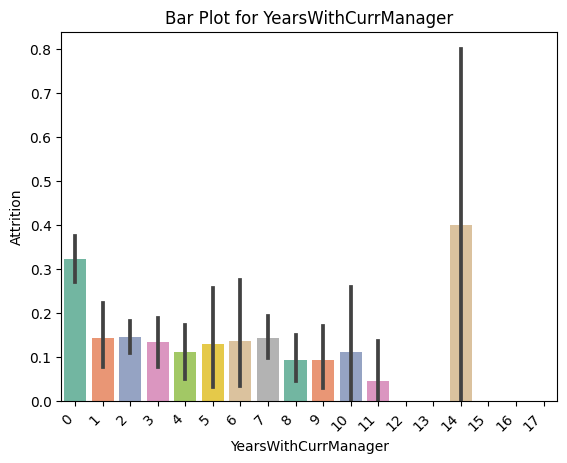

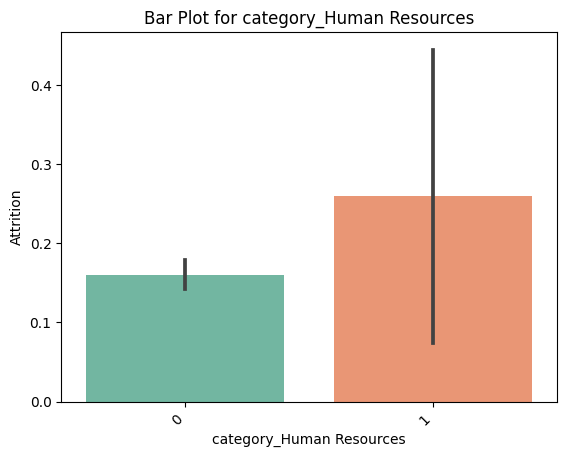

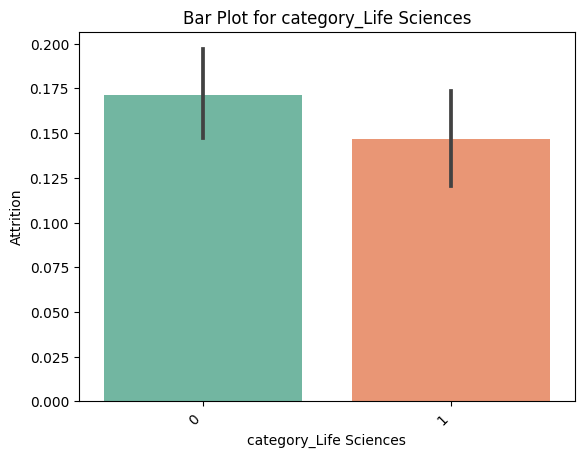

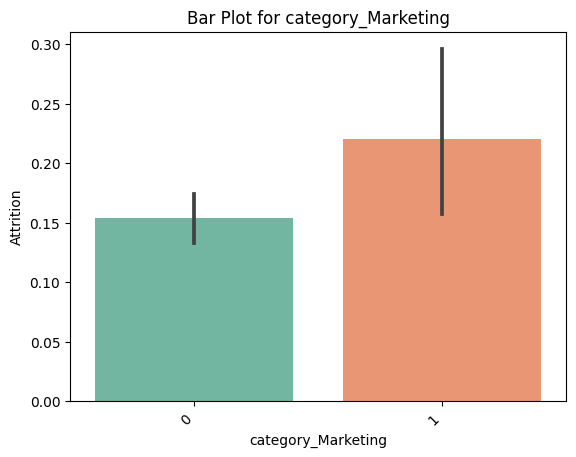

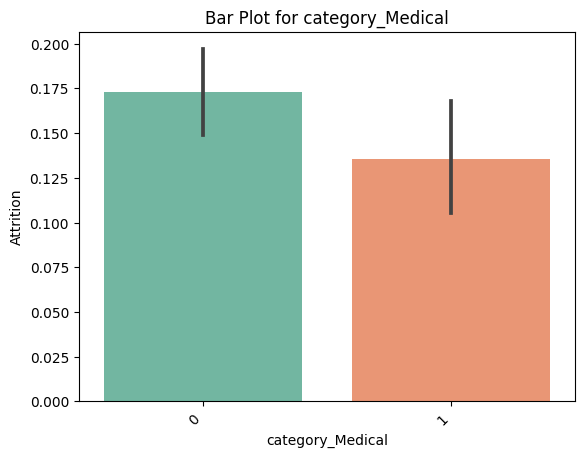

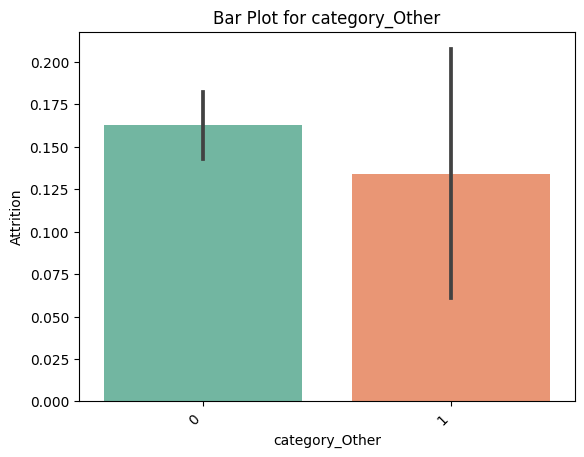

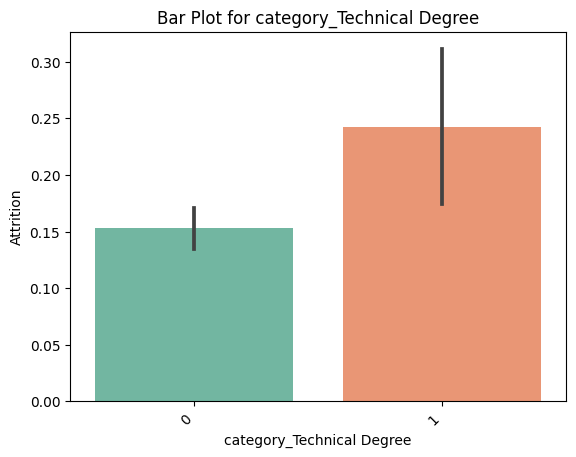

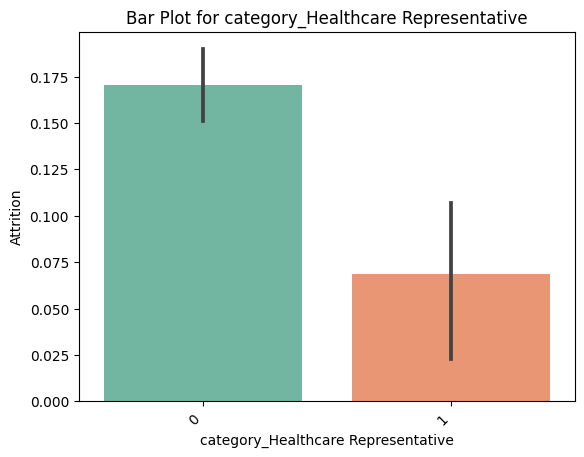

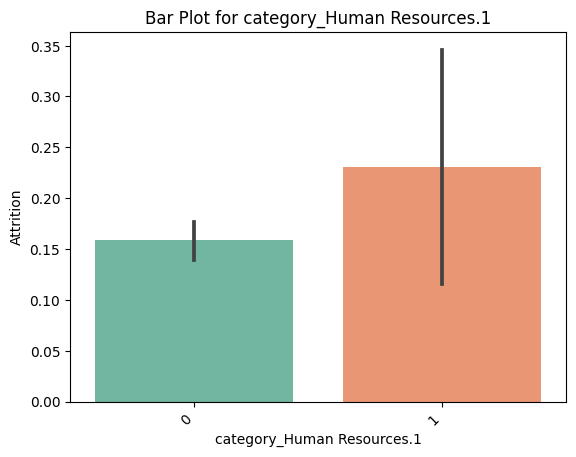

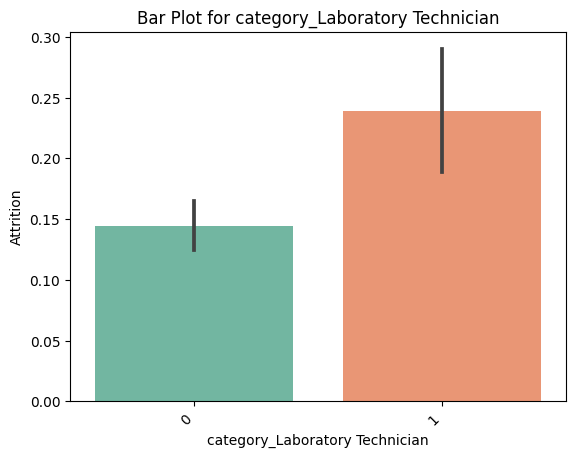

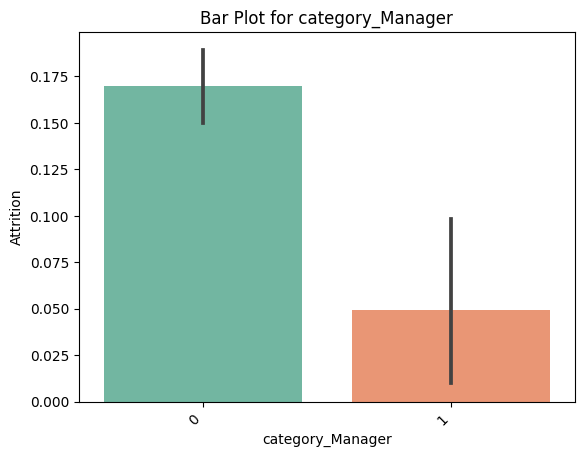

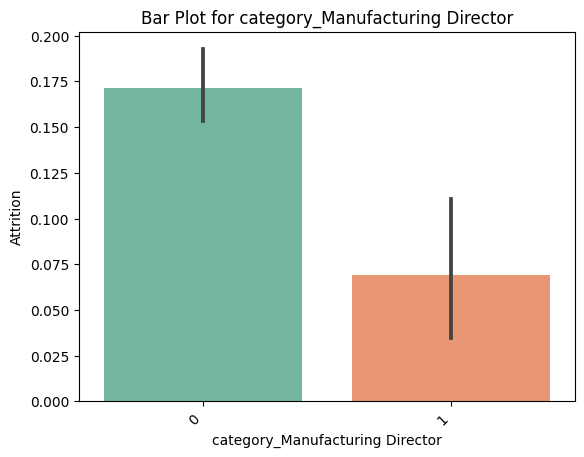

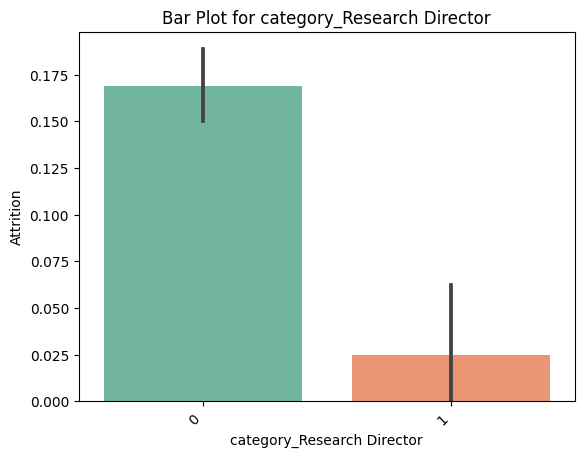

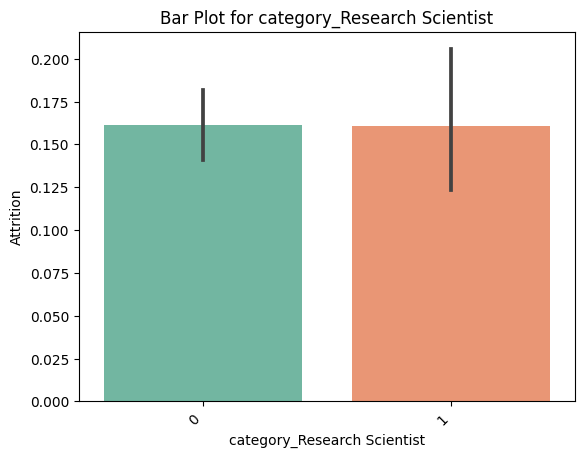

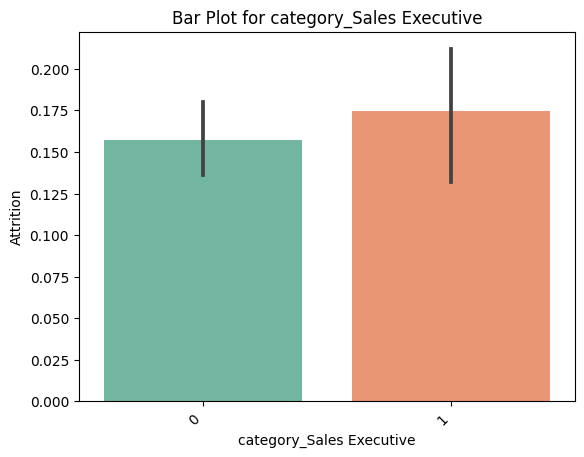

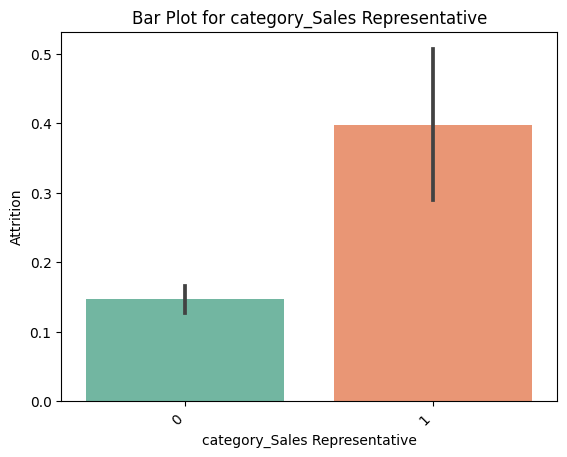

In [49]:
def graph_emp(df, y):
    for column in df.columns:
        sns.barplot(x=column, y=y, data=df, palette='Set2')
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Attrition')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.show()

# Assuming 'df' is your DataFrame containing the data
# Assuming 'y' is the column you want to use for the y-axis
graph_emp(df, y)

In [50]:
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train.shape

(1176, 47)

In [53]:
X_test.shape

(294, 47)

In [54]:
y_train.shape

(1176,)

In [55]:
y_test.shape

(294,)

In [56]:
from sklearn.metrics import accuracy_score, classification_report

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Initialize logistic regression classifier
lr = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV with logistic regression classifier and hyperparameters grid
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator to make predictions on the test data
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


In [58]:
score_lr = round(accuracy_score(y_test, y_pred_lr)*100, 2)
print(f'The accuracy score achieved using Logistic Regression is: {str(score_lr)} %')

report = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(report)

The accuracy score achieved using Logistic Regression is: 86.39 %
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.67      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.78      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294

